In [2]:
import numpy as np
import pymc3 as pm
import seaborn as sns

In [1]:
n_obs = 10
n_android = 6

In [50]:
with pm.Model() as model:
  p = pm.Beta("p", alpha=1, beta=1)
  X = pm.Binomial("X", n=n_obs, p=p, observed=n_android)

In [51]:
with model:
    posterior = pm.sample(draws=4000, tune=2000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.


In [52]:
ps = posterior.p
len(ps), ps

(8000, array([0.61232156, 0.61232156, 0.48252261, ..., 0.36591339, 0.36335691,
        0.38673983]))

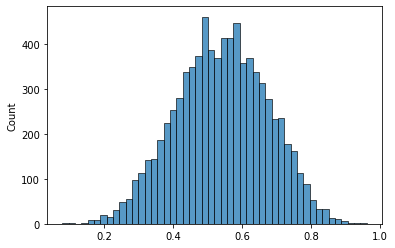

In [53]:
sns.histplot(ps)

In [54]:
ps.mean()

0.5398034263108342

In [43]:
np.median(ps)

0.5923351683693323

In [44]:
np.percentile(ps, q=(2.5, 97.5))

array([0.3099814 , 0.83392209])

## "안드로이드"에 걸면 손해 볼 확률?

In [45]:
bet = 1e4
returns = bet * ps - bet * (1 - ps)

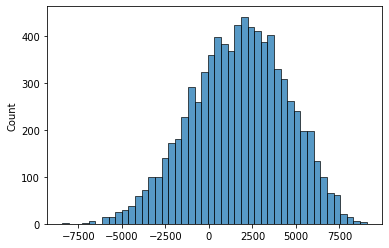

In [46]:
sns.histplot(returns)

In [47]:
(returns < 0).mean()

0.263875